In [1]:
from scipy.io import arff
import pandas as pd

In [2]:

data, meta = arff.loadarff('ECG200_TEST.arff')
df = pd.DataFrame(data)

In [6]:
df.shape

(100, 97)

In [4]:
data_train, meta_train = arff.loadarff('ECG200_TRAIN.arff')
df_train = pd.DataFrame(data_train)

In [7]:
df_train.shape

(100, 97)

In [8]:
# Combine train and test datasets
df_combined = pd.concat([df_train, df], axis=0, ignore_index=True)
df_combined.shape

(200, 97)

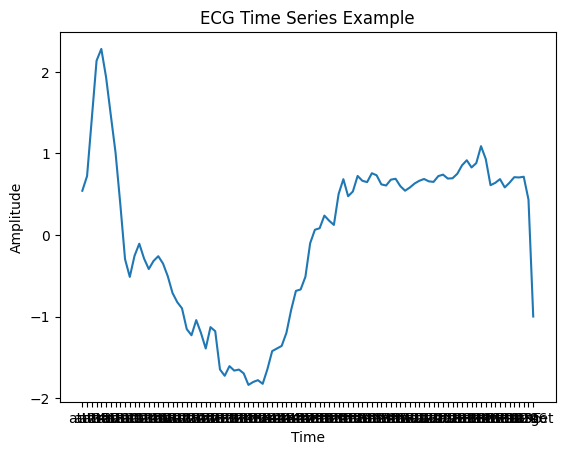

In [ ]:
import matplotlib.pyplot as plt


In [10]:
# Check the unique classes in the target column
print("Columns:", df_combined.columns.tolist())
print("\nUnique classes:", df_combined['target'].unique())
print("Class counts:\n", df_combined['target'].value_counts())

Columns: ['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41', 'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49', 'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64', 'att65', 'att66', 'att67', 'att68', 'att69', 'att70', 'att71', 'att72', 'att73', 'att74', 'att75', 'att76', 'att77', 'att78', 'att79', 'att80', 'att81', 'att82', 'att83', 'att84', 'att85', 'att86', 'att87', 'att88', 'att89', 'att90', 'att91', 'att92', 'att93', 'att94', 'att95', 'att96', 'target']

Unique classes: [b'-1' b'1']
Class counts:
 target
b'1'     133
b'-1'     67
Name: count, dtype: int64


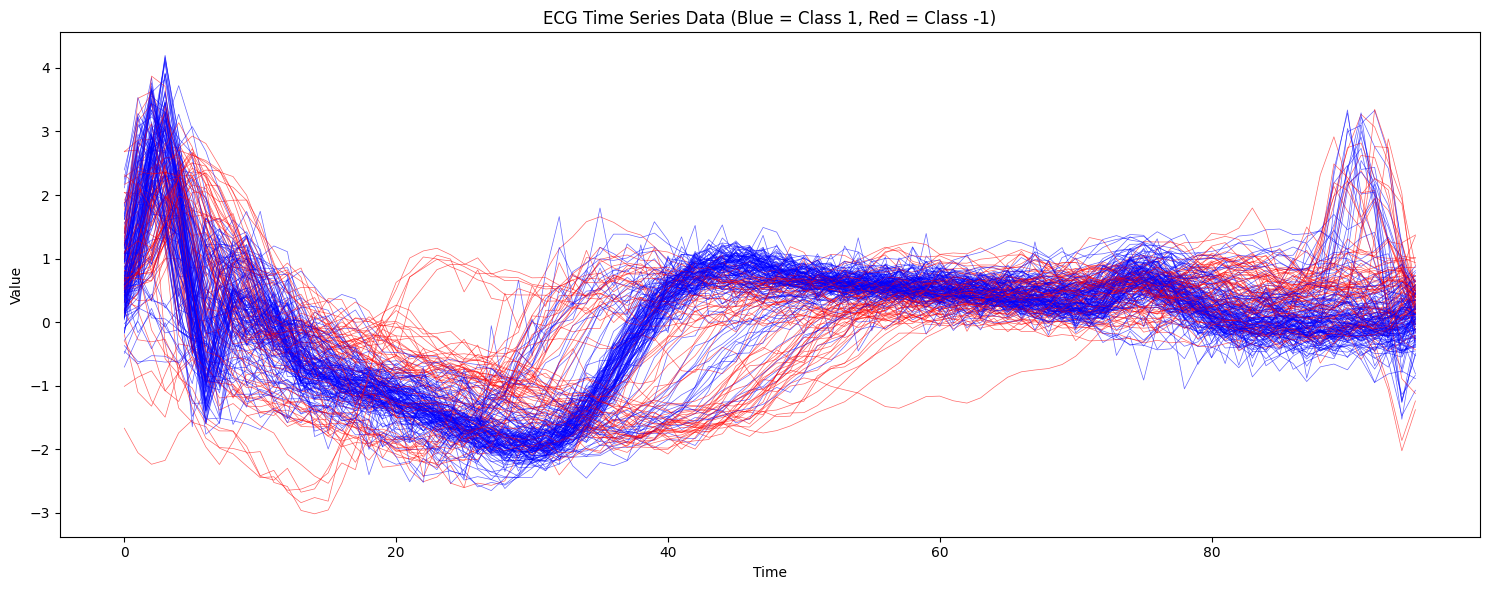

In [12]:
# Plot all time series data on the same time axis
plt.figure(figsize=(15, 6))

# Get feature columns (all columns except 'target')
feature_cols = [col for col in df_combined.columns if col != 'target']

# Plot each sample
for idx in range(len(df_combined)):
    row = df_combined.iloc[idx]
    color = 'blue' if row['target'] == b'1' else 'red'
    
    # Extract the time series values
    values = row[feature_cols].values.astype(float)
    
    # Plot on same x-axis (0 to 96)
    plt.plot(values, color=color, alpha=0.6, linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ECG Time Series Data (Blue = Class 1, Red = Class -1)')
plt.tight_layout()
plt.show()